In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob
from scipy import stats
from scipy import misc

In [2]:
path = os.getcwd()
parent_directory = os.path.dirname(path)
path = os.path.join(parent_directory, 'Data')

list_folders = [f.path for f in os.scandir(path) if f.is_dir()]
order = [0,2,1]
list_folders = np.array(list_folders)[order]

Scale_study_list=[]

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(Path(folder), "*B_0_study.txt"))
    
    if len(MSE_paths) != 0:
        print(MSE_paths)
        for path in MSE_paths:
            data=pd.read_csv(path, header=None, sep=" ")
            data.columns = ["PHIEDGE","B0","f_B"]
            Scale_study_list.append(data)
            


['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QH']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/B_0_study.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QH/B_0_study.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_B_0_study.txt']


In [3]:
vol_eff_opt_list = []

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(Path(folder), "*vol_eff_opt.txt"))
    
    if len(MSE_paths) != 0:
        print(MSE_paths)
        for path in MSE_paths:
            vol_eff_opt_list.append(np.loadtxt(path,usecols=0))

['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/vol_eff_opt.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QH/vol_eff_opt.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/vol_eff_opt.txt']


In [4]:
vol_eff_plateau_list = []

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(Path(folder), "*vol_eff_plateau.txt"))
    
    if len(MSE_paths) != 0:
        print(MSE_paths)
        for path in MSE_paths:
            vol_eff_plateau_list.append(np.loadtxt(path,usecols=0))

['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/vol_eff_plateau.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QH/vol_eff_plateau.txt']
['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/vol_eff_plateau.txt']


/tmp/ipykernel_2102/161059022.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(5e-7,0.0)
/tmp/ipykernel_2102/161059022.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(5e-7,0.0)
/tmp/ipykernel_2102/161059022.py:52: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f984922f940> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
/tmp/ipykernel_2102/161059022.py:52: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f98491d8190> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
/tmp/ipykernel_2102/161059022.py:52: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f98491e50d0> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
/tmp/

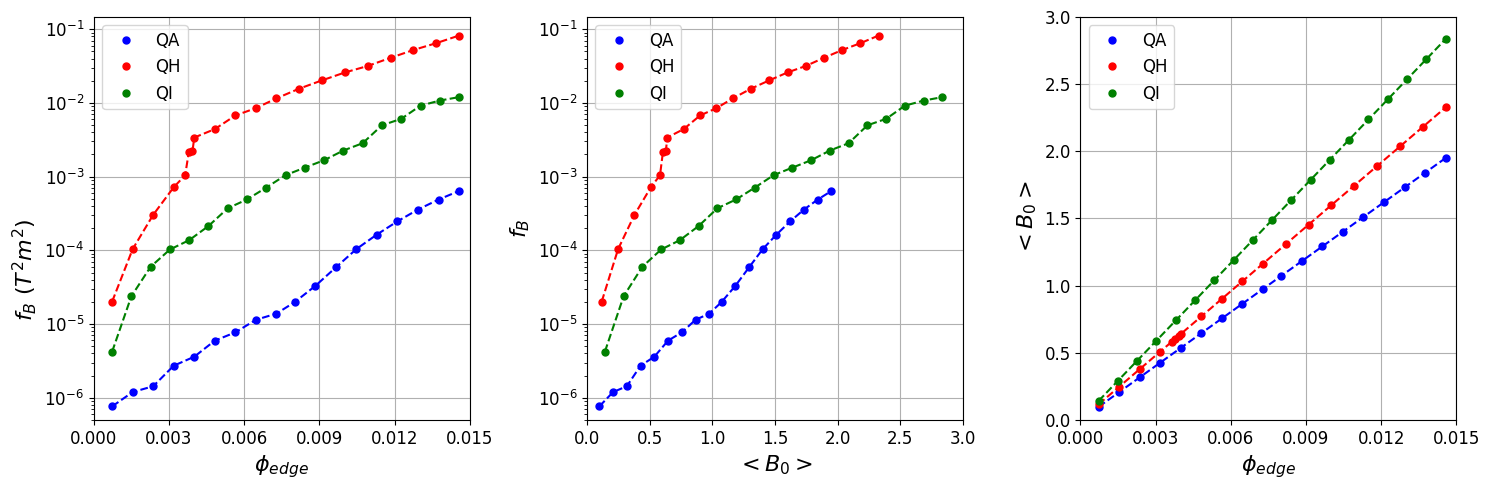

In [5]:
f, ax = plt.subplots(1,3,figsize = (15,5))
setup_list = ["b.","b--","r.","r--","g.","g--"]

for i in range(len(Scale_study_list)):
    if i == 1:
        PHIEDGE = Scale_study_list[i]["PHIEDGE"][:-4]
        B0 = Scale_study_list[i]["B0"][:-4]
        f_B = Scale_study_list[i]["f_B"][:-4]
    else:    
        PHIEDGE = Scale_study_list[i]["PHIEDGE"]
        if PHIEDGE[2] < 0:
            PHIEDGE = abs(PHIEDGE)
        B0 = Scale_study_list[i]["B0"]
        f_B = Scale_study_list[i]["f_B"]

    ax[0].semilogy(PHIEDGE, f_B, setup_list[2*i],markersize=10)
    ax[0].semilogy(PHIEDGE, f_B, setup_list[2*i+1])
    
    ax[1].semilogy(B0, f_B, setup_list[2*i],markersize=10)
    ax[1].semilogy(B0, f_B, setup_list[2*i+1])

    ax[2].plot(PHIEDGE, B0, setup_list[2*i],markersize=10)
    ax[2].plot(PHIEDGE, B0, setup_list[2*i+1])


ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)
ax[0].grid(True,which = 'major')
ax[0].set_xlabel(r'$\phi_{edge}$', fontsize=16)
ax[0].set_ylabel(r'$f_B$ $(T^2m^2)$',fontsize=16, horizontalalignment='right')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)
ax[1].grid(True,which = 'major')
ax[1].set_xlabel(r'$<B_0>$',fontsize=16)
ax[1].set_ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='minor', labelsize=12)
ax[2].grid(True,which = 'both')
ax[2].set_xlabel(r'$\phi_{edge}$',fontsize=16)
ax[2].set_ylabel(r'$<B_0>$',fontsize=16)
ax[0].set_xlim(0,0.015)
ax[1].set_xlim(0,3.0)
ax[2].set_xlim(0,0.015)
ax[0].set_ylim(5e-7,0.0)
ax[1].set_ylim(5e-7,0.0)
ax[2].set_ylim(0,3.0)
ax[0].set_xticks(np.linspace(0,0.015,6))
ax[2].set_xticks(np.linspace(0,0.015,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_ylim(1e-6,1e-2)
ax[0].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
ax[1].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
ax[2].legend(["QA","_","QH","_", "QI","_"], fontsize = 12)
plt.tight_layout()
#plt.savefig('./Plots/ScaleStudy_PHIEDGE_B0_MSE.pdf')


/tmp/ipykernel_2102/3145550490.py:38: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844f37220> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
/tmp/ipykernel_2102/3145550490.py:38: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844f37df0> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
/tmp/ipykernel_2102/3145550490.py:38: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844f47820> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
/tmp/ipykernel_2102/3145550490.py:39: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844f37760> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
/tmp

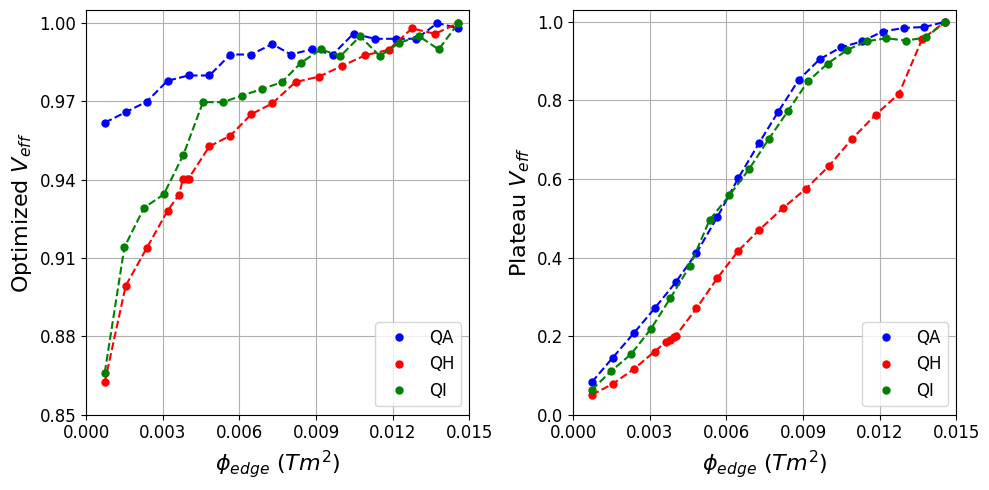

In [6]:
f, ax = plt.subplots(1,2,figsize = (10,5))


for i in range(len(Scale_study_list)):
    PHIEDGE = Scale_study_list[i]["PHIEDGE"]
    if PHIEDGE[2] < 0:
        PHIEDGE = abs(PHIEDGE)
    if i == 1:
        PHIEDGE = Scale_study_list[i]["PHIEDGE"][:-4]
        vol_eff_opt_list[i] = vol_eff_opt_list[i][:-4]
        vol_eff_plateau_list[i] = vol_eff_plateau_list[i][:-4]

    ax[0].plot(PHIEDGE, vol_eff_opt_list[i]/max(vol_eff_opt_list[i]), setup_list[2*i],markersize=10)
    ax[0].plot(PHIEDGE, vol_eff_opt_list[i]/max(vol_eff_opt_list[i]), setup_list[2*i+1])
    
    ax[1].plot(PHIEDGE, vol_eff_plateau_list[i]/max(vol_eff_plateau_list[i]), setup_list[2*i],markersize=10)
    ax[1].plot(PHIEDGE, vol_eff_plateau_list[i]/max(vol_eff_plateau_list[i]), setup_list[2*i+1])

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)
ax[0].grid(True,which = 'both')
ax[0].set_xlabel(r'$\phi_{edge}$ $(Tm^2)$',fontsize=16)
ax[0].set_ylabel(r'Optimized $V_{eff}$',fontsize=16)#, horizontalalignment='right'

ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)
ax[1].grid(True,which = 'both')
ax[1].set_xlabel(r'$\phi_{edge}$ $(Tm^2)$',fontsize=16)
ax[1].set_ylabel(r'Plateau $V_{eff}$',fontsize=16)
ax[0].set_xlim(0,0.015)
ax[1].set_xlim(0,0.015)
ax[0].set_xticks(np.linspace(0,0.015,6))
ax[1].set_xticks(np.linspace(0,0.015,6))
ax[0].set_ylim(0.85,1.005)
ax[0].set_yticks(np.linspace(0.85,1.0,6))
ax[1].set_ylim(0,1.03)
#ax.set_ylim(1e-6,1e-2)
ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
ax[1].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig('./Plots/ScaleStudy_PHIEDGE_Veff.pdf') 

/tmp/ipykernel_2102/2318022206.py:29: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844de8e80> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best")
/tmp/ipykernel_2102/2318022206.py:29: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844df6a00> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best")
/tmp/ipykernel_2102/2318022206.py:29: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844e04430> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best")
/tmp/ipykernel_2102/2318022206.py:30: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844df62e0> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")
/tmp/ipykernel_2102/23180

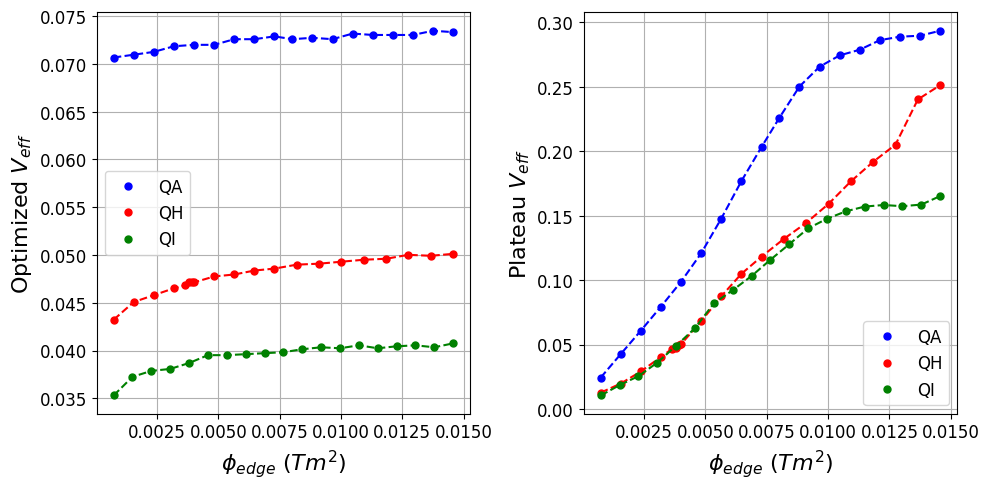

In [7]:
f, ax = plt.subplots(1,2,figsize = (10,5))

for i in range(len(Scale_study_list)):
    PHIEDGE = Scale_study_list[i]["PHIEDGE"]
    if PHIEDGE[2] < 0:
        PHIEDGE = abs(PHIEDGE)
    if i == 1:
        PHIEDGE = Scale_study_list[i]["PHIEDGE"][:-4]
        #vol_eff_opt_list[i] = vol_eff_opt_list[i][:-4]
        #vol_eff_plateau_list[i] = vol_eff_plateau_list[i][:-4]
        
    ax[0].plot(PHIEDGE, vol_eff_opt_list[i], setup_list[2*i],markersize=10)
    ax[0].plot(PHIEDGE, vol_eff_opt_list[i], setup_list[2*i+1])
    
    ax[1].plot(PHIEDGE, vol_eff_plateau_list[i], setup_list[2*i],markersize=10)
    ax[1].plot(PHIEDGE, vol_eff_plateau_list[i], setup_list[2*i+1])

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)
ax[0].grid(True,which = 'both')
ax[0].set_xlabel(r'$\phi_{edge}$ $(Tm^2)$',fontsize=16)
ax[0].set_ylabel(r'Optimized $V_{eff}$',fontsize=16)#, horizontalalignment='right'

ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)
ax[1].grid(True,which = 'both')
ax[1].set_xlabel(r'$\phi_{edge}$ $(Tm^2)$',fontsize=16)
ax[1].set_ylabel(r'Plateau $V_{eff}$',fontsize=16)
ax[0].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best")
ax[1].legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="lower right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

/tmp/ipykernel_2102/18287317.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844d00c40> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=14,loc="best", borderpad=0.1)
/tmp/ipykernel_2102/18287317.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844d0d670> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=14,loc="best", borderpad=0.1)
/tmp/ipykernel_2102/18287317.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9844d0d820> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=14,loc="best", borderpad=0.1)


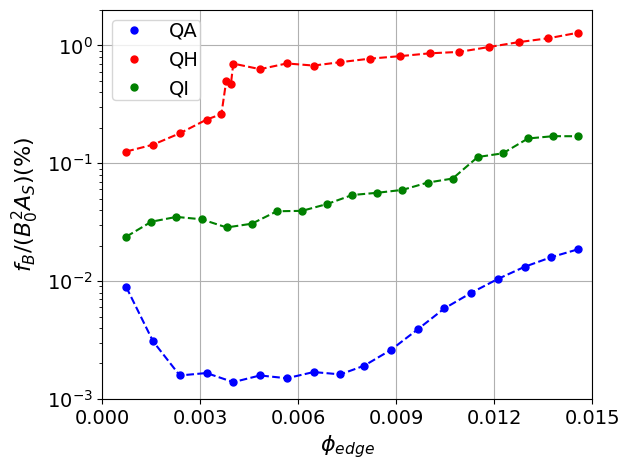

In [8]:
R_major = 0.46
R_minor = np.array([0.0496524253046927, 0.0649999084626802, 0.0483678400716886]) #In the order QA QH QI

surf = 4*np.pi*np.pi*R_major*R_minor

for i in range(len(Scale_study_list)):
    PHIEDGE = Scale_study_list[i]["PHIEDGE"]
    B0 = Scale_study_list[i]["B0"]
    f_B = Scale_study_list[i]["f_B"]
    if i ==1:
        PHIEDGE = Scale_study_list[i]["PHIEDGE"][:-4]
        B0 = Scale_study_list[i]["B0"][:-4]
        f_B = Scale_study_list[i]["f_B"][:-4]
    if PHIEDGE[2] < 0:
        PHIEDGE = abs(PHIEDGE)

    plt.semilogy(PHIEDGE, f_B/(B0**2*surf[i])*100, setup_list[2*i],markersize=10)
    plt.semilogy(PHIEDGE, f_B/(B0**2*surf[i])*100, setup_list[2*i+1])
    
plt.xlabel(r'$\phi_{edge}$',fontsize=16)
plt.ylabel(r'$f_B/(B_0^2 A_S) (\%)$',fontsize=16)
plt.xlim(0,0.015)
plt.ylim(0.001,2)
plt.xticks(np.linspace(0,0.015,6),fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.legend(["QA","_","QH","_", "QI","_"],fontsize=14,loc="best", borderpad=0.1)
plt.tight_layout()

plt.savefig('../Plots/ScaleStudy_PHIEDGE_fB_normalized_log.pdf') 

[0.90169162 1.18040302 0.87836346]


/tmp/ipykernel_2102/1878926106.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f9847104670> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best", borderpad=0.1)
/tmp/ipykernel_2102/1878926106.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f984708c0a0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best", borderpad=0.1)
/tmp/ipykernel_2102/1878926106.py:27: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7f984708c1c0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best", borderpad=0.1)


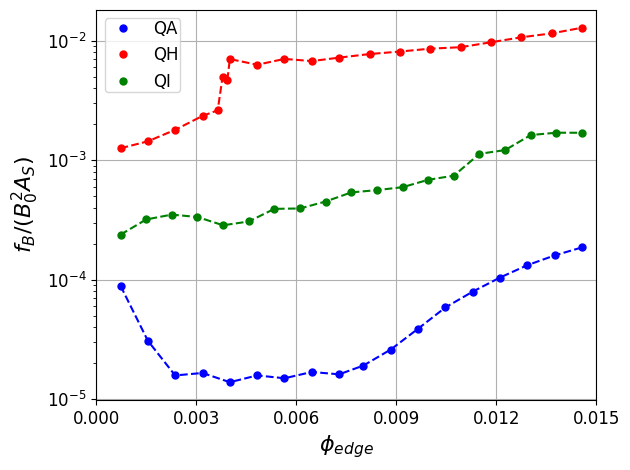

In [9]:
R_major = 0.46
R_minor = np.array([0.0496524253046927, 0.0649999084626802, 0.0483678400716886]) #In the order QA QH QI
nfp = np.array([2, 4, 5]) #In the order QA QH QI
surf = 4*np.pi*np.pi*R_major*R_minor
print(surf)
for i in range(len(Scale_study_list)):
    PHIEDGE = Scale_study_list[i]["PHIEDGE"]
    B0 = Scale_study_list[i]["B0"]
    f_B = Scale_study_list[i]["f_B"]
    if i ==1:
        PHIEDGE = Scale_study_list[i]["PHIEDGE"][:-4]
        B0 = Scale_study_list[i]["B0"][:-4]
        f_B = Scale_study_list[i]["f_B"][:-4]
    if PHIEDGE[2] < 0:
        PHIEDGE = abs(PHIEDGE)

    plt.semilogy(PHIEDGE, f_B/(B0**2*surf[i]), setup_list[2*i],markersize=10)
    plt.semilogy(PHIEDGE, f_B/(B0**2*surf[i]), setup_list[2*i+1])
    
plt.xlabel(r'$\phi_{edge}$',fontsize=16)
plt.ylabel(r'$f_B/(B_0^2 A_S)$',fontsize=16)
plt.xlim(0,0.015)
#plt.ylim(0.002,10)
plt.xticks(np.linspace(0,0.015,6),fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.legend(["QA","_","QH","_", "QI","_"],fontsize=12,loc="best", borderpad=0.1)
plt.tight_layout()
